In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('Fintech_user.csv')

In [2]:
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
df.shape

(27000, 31)

In [4]:
df.user.nunique()

24741

In [5]:
df.drop_duplicates().shape

(26542, 31)

In [6]:
df1 = df.drop_duplicates().reset_index(drop = True)
df1.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [7]:
df1.shape

(26542, 31)

In [8]:
grp = df1.groupby('user')
cnt = 0
for user,user_df in grp:
    if(cnt==10): break
    if len(user_df)>2:
        cnt+=1
        print((user_df))

       user  churn   age housing  credit_score  deposits  withdrawal  \
8094    262      0  45.0       R         544.0         0           0   
23049   262      0  45.0       R         542.0         0           0   
25596   262      0  46.0       R         544.0         0           0   

       purchases_partners  purchases  cc_taken  ...  waiting_4_loan  \
8094                  143          0         0  ...               0   
23049                 143          0         0  ...               0   
25596                 143          0         0  ...               0   

       cancelled_loan  received_loan  rejected_loan  zodiac_sign  \
8094                0              0              0        Libra   
23049               0              0              0        Libra   
25596               0              0              0        Libra   

       left_for_two_month_plus  left_for_one_month  rewards_earned  \
8094                         0                   0            54.0   
23049        

In [9]:
df1[df1['user']==327]

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
21329,327,0,33.0,O,408.0,1,1,25,1,0,...,0,0,0,0,Libra,0,0,12.0,0.67,0
21571,327,0,32.0,O,408.0,1,1,25,1,0,...,0,0,0,0,Libra,0,0,12.0,0.67,0
23968,327,0,31.0,O,409.0,1,1,25,1,0,...,0,0,0,0,Libra,0,0,12.0,0.67,0


In [10]:
df1[df1['user']==2601]

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
193,2601,0,42.0,R,486.0,0,0,42,0,0,...,0,0,0,0,Aquarius,1,0,43.0,1.43,1
14368,2601,0,43.0,R,485.0,0,0,42,0,0,...,0,0,0,0,Aquarius,1,0,43.0,1.43,1
20472,2601,0,43.0,R,486.0,0,0,42,0,0,...,0,0,0,0,Aquarius,1,0,43.0,1.43,1


In [11]:
# so here we can understand that the data is for several years that is why there are repetetions in the users so let us make filter them by choosing the 
# highrst age and the mminimum credit score for them
df2 = pd.DataFrame()
for user,user_df in grp:
    if len(user_df)==1: df2 = pd.concat([df2,user_df],ignore_index = True)
    else:
        max_age = user_df['age'].max()
        min_credit = user_df['credit_score'].min()
        if len(user_df[user_df['age'] == max_age])>1:
            df2 = pd.concat([df2,user_df[(user_df['age']==max_age) & (user_df['credit_score']==min_credit)]],ignore_index = True)
        else:
            df2 = pd.concat([df2,user_df[user_df['age']==max_age]],ignore_index = True)

In [12]:
df2.shape

(24735, 31)

In [13]:
df2.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,1,0,21.0,R,577.0,48,4,52,45,0,...,0,0,0,0,Pisces,0,0,56.0,1.87,0
1,4,0,35.0,R,566.0,15,0,73,15,0,...,0,0,0,0,na,0,0,49.0,1.63,0
2,8,1,31.0,na,519.0,0,0,0,0,0,...,0,0,0,0,Virgo,0,0,18.0,0.60,1
3,9,0,26.0,na,NaN,0,0,30,0,0,...,0,0,0,0,Sagittarius,0,0,23.0,0.77,0
4,10,0,33.0,R,558.0,0,0,76,0,0,...,0,0,0,0,Leo,1,0,45.0,1.50,1


In [14]:
df2.user.nunique

<bound method IndexOpsMixin.nunique of 0            1
1            4
2            8
3            9
4           10
         ...  
24730    69650
24731    69651
24732    69653
24733    69655
24734    69658
Name: user, Length: 24735, dtype: int64>

In [15]:
len(grp)

24741

In [16]:
# here just beacuase of the credit score basis we have filtered the users so 6 rows of data is not recovered because of this but it won't cause any 
# impact for the model becuase of very small in nature (6 rows)
df2.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,1,0,21.0,R,577.0,48,4,52,45,0,...,0,0,0,0,Pisces,0,0,56.0,1.87,0
1,4,0,35.0,R,566.0,15,0,73,15,0,...,0,0,0,0,na,0,0,49.0,1.63,0
2,8,1,31.0,na,519.0,0,0,0,0,0,...,0,0,0,0,Virgo,0,0,18.0,0.60,1
3,9,0,26.0,na,NaN,0,0,30,0,0,...,0,0,0,0,Sagittarius,0,0,23.0,0.77,0
4,10,0,33.0,R,558.0,0,0,76,0,0,...,0,0,0,0,Leo,1,0,45.0,1.50,1


In [17]:
df2['housing'].unique()

array(['R', 'na', 'O'], dtype=object)

In [18]:
print(len(df2[df2['housing']=='na']),
len(df2[df2['housing']=='O']),
len(df2[df2['housing']=='R']))

12765 1958 10012


In [19]:
# so housing is not a good indicator we do not neeed that
df2['deposits'].unique()

array([48, 15,  0,  2,  1, 60, 17, 10, 12, 11, 52, 16, 29,  7,  3, 13, 35,
        9, 43, 55, 20, 38, 21, 59,  6, 62,  4, 23,  5, 37, 44, 46,  8, 18,
       41, 34, 53, 56, 14, 27, 32, 50, 54, 45, 25, 42, 22, 31, 30, 24, 19,
       33, 57, 39, 58, 47, 26, 36, 28, 40, 51, 61, 49, 64, 63, 65],
      dtype=int64)

In [20]:
df3 = df2.drop('housing',axis = 1)
df3.head()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,1,0,21.0,577.0,48,4,52,45,0,245,...,0,0,0,0,Pisces,0,0,56.0,1.87,0
1,4,0,35.0,566.0,15,0,73,15,0,199,...,0,0,0,0,na,0,0,49.0,1.63,0
2,8,1,31.0,519.0,0,0,0,0,0,49,...,0,0,0,0,Virgo,0,0,18.0,0.60,1
3,9,0,26.0,NaN,0,0,30,0,0,56,...,0,0,0,0,Sagittarius,0,0,23.0,0.77,0
4,10,0,33.0,558.0,0,0,76,0,0,166,...,0,0,0,0,Leo,1,0,45.0,1.50,1


In [21]:
df3.isna().any()

user                       False
churn                      False
age                         True
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referred                False
dtype: boo

In [22]:
# let us fill the age by the mean age and for the credit_score as well
mean_cs = df3['credit_score'][df3['credit_score'].isna()==False].mean()
mean_age = df3['age'][df3['age'].isna()==False].mean()
df3['credit_score'] = df3['credit_score'].fillna(mean_cs)
df3['age'] = df3['age'].fillna(mean_age)

In [23]:
df3.isna().any()

user                       False
churn                      False
age                        False
credit_score               False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referred                False
dtype: boo

In [24]:
np.sort(df3['rewards_earned'].unique())
# we got NaN here so let us fill it with the 0 beacuse no rewards means 0 right

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        90.,  99., 114.,  nan])

In [25]:
df3.head()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,1,0,21.0,577.000000,48,4,52,45,0,245,...,0,0,0,0,Pisces,0,0,56.0,1.87,0
1,4,0,35.0,566.000000,15,0,73,15,0,199,...,0,0,0,0,na,0,0,49.0,1.63,0
2,8,1,31.0,519.000000,0,0,0,0,0,49,...,0,0,0,0,Virgo,0,0,18.0,0.60,1
3,9,0,26.0,542.505153,0,0,30,0,0,56,...,0,0,0,0,Sagittarius,0,0,23.0,0.77,0
4,10,0,33.0,558.000000,0,0,76,0,0,166,...,0,0,0,0,Leo,1,0,45.0,1.50,1


In [26]:
df4 = pd.DataFrame()
for user,user_df in grp:
    if len(user_df)==1: df4 = pd.concat([df4,user_df],ignore_index = True)
    else:
        max_age = user_df['age'].max()
        min_credit = user_df['credit_score'].min()
        
        df4 = pd.concat([df4,user_df[user_df['age']==max_age]],ignore_index = True)
df4.shape
# from this we can understand that our assumption in df2 max_age and min/-credit is the better option for the analysis  (25085 and 24735)

(25085, 31)

In [27]:
df3.sample(5)

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
8116,23540,0,24.0,476.0,0,0,0,0,2,174,...,0,0,0,0,Aries,0,0,51.0,1.70,1
2675,7508,1,41.0,618.0,0,0,0,0,0,88,...,0,0,0,0,Scorpio,1,1,37.0,1.23,0
6147,17730,1,31.0,484.0,0,0,21,0,0,58,...,0,0,0,0,Scorpio,1,0,17.0,0.57,1
2689,7548,0,30.0,564.0,1,1,3,1,0,229,...,0,0,0,0,Virgo,0,0,60.0,2.00,1
7567,21913,0,21.0,527.0,0,0,46,0,0,77,...,0,0,0,0,Virgo,0,0,32.0,1.07,0


In [28]:
# so now we do not need the user_id and also the zodiac_sign (assuming we do not believe the superstitions) and also the payment type 
df4 = df3.drop(['user','zodiac_sign','payment_type'],axis = 'columns')
df4.head(3)

,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,0,21.0,577.0,48,4,52,45,0,245,0,...,2,0,0,0,0,0,0,56.0,1.87,0
1,0,35.0,566.0,15,0,73,15,0,199,0,...,0,0,0,0,0,0,0,49.0,1.63,0
2,1,31.0,519.0,0,0,0,0,0,49,0,...,0,0,0,0,0,0,0,18.0,0.60,1


In [29]:
df4.columns

Index(['churn', 'age', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'rewards_earned', 'reward_rate', 'is_referred'],
      dtype='object')

In [30]:
df4['churn'][df4['churn']==0].shape

(13563,)

In [31]:
# let us categorise the columns into the 1.basic_info of customer 2.customer behaviour 3.digital_engagement 4.cc_behaviour
# 5.Loan information 6.rewards 7. referal 8.activeness

Text(0, 0.5, 'Credit score of the customer')

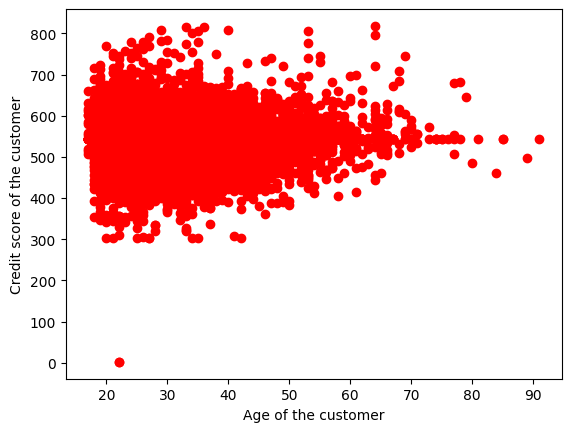

In [32]:
# 1.basic_info consists age and his credit score
# for this first let us do scatter plot first between them based on the churn
churn_df = df4[df4['churn']==1][['age','credit_score']]
nonchurn_df = df4[df4['churn']==0]
plt.scatter(churn_df['age'],churn_df['credit_score'],color = 'red')
# plt.scatter(nonchurn_df['age'],nonchurn_df['credit_score'],color = 'blue')
plt.xlabel('Age of the customer')
plt.ylabel('Credit score of the customer')

Text(0, 0.5, 'Credit score of the customer')

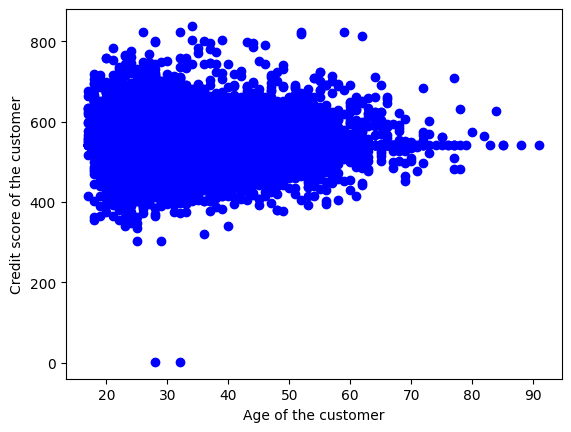

In [33]:
plt.scatter(nonchurn_df['age'],nonchurn_df['credit_score'],color = 'blue')
plt.xlabel('Age of the customer')
plt.ylabel('Credit score of the customer')

In [34]:
# we can observe that there is no much difference
# we need to know that the credit score must be greater than the 300
df5 = df4[(df4['credit_score']>=300) & (df4['credit_score']<=850)]
df5.shape

(24731, 27)

(array([[ 351., 5400., 3416., 1363.,  473.,  135.,   28.],
        [ 310., 5935., 4376., 1901.,  756.,  239.,   39.]]),
 array([10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 2 BarContainer objects>)

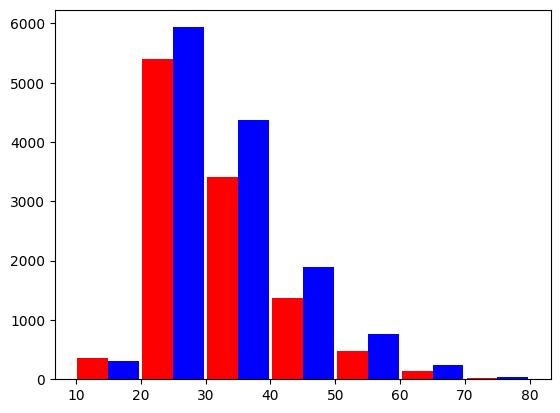

In [35]:
plt.hist([churn_df['age'],nonchurn_df['age']],bins = [10,20,30,40,50,60,70,80],color = ['red','blue'],rwidth = 0.95)

(array([[1.2200e+02, 1.7920e+03, 8.3490e+03, 8.3300e+02, 6.6000e+01,
         8.0000e+00],
        [6.7000e+01, 1.7070e+03, 1.0059e+04, 1.6090e+03, 1.0800e+02,
         1.1000e+01]]),
 array([300., 400., 500., 600., 700., 800., 900.]),
 <a list of 2 BarContainer objects>)

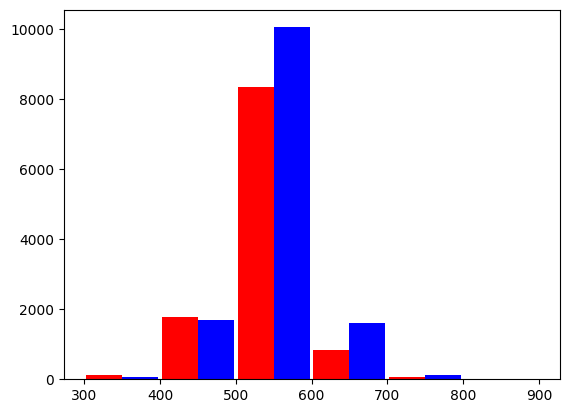

In [36]:
plt.hist([churn_df['credit_score'],nonchurn_df['credit_score']],bins = [300,400,500,600,700,800,900],color = ['red','blue'],rwidth = 0.95)

In [37]:
# so these 2columns are not as good as we thought but credit_score does some impact

Text(0, 0.5, 'number of withdrawals')

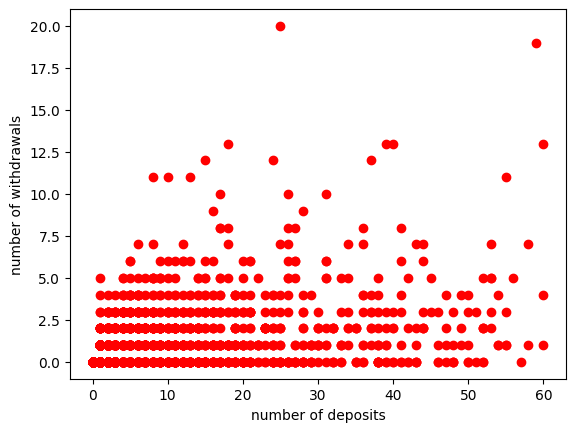

In [38]:
# we cannot do with the basis of age or credit_score much since the churned and non churned  data is almost showing same behaviour
# 2.Customer behaviour 
churn_df = df5[df5['churn']==1][['deposits','withdrawal','purchases','purchases_partners','age']]
nonchurn_df = df5[df5['churn']==0][['deposits','withdrawal','purchases','purchases_partners','age']]
plt.scatter(churn_df['deposits'],churn_df['withdrawal'],color = 'red')
# plt.scatter(nonchurn_df['deposits'],nonchurn_df['withdrawal'],color = 'blue')
plt.xlabel('number of deposits')
plt.ylabel('number of withdrawals')

Text(0, 0.5, 'number of withdrawals')

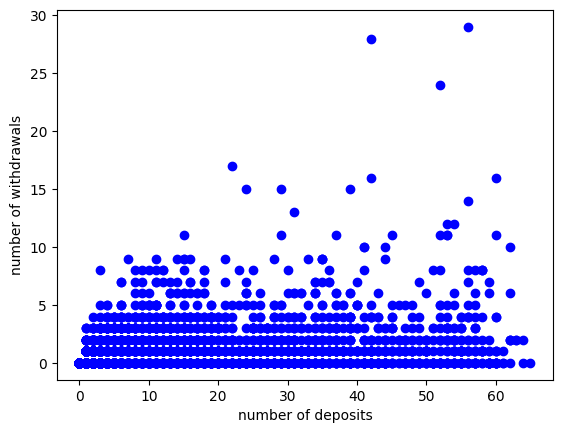

In [39]:
plt.scatter(nonchurn_df['deposits'],nonchurn_df['withdrawal'],color = 'blue')
plt.xlabel('number of deposits')
plt.ylabel('number of withdrawals')

(array([[366., 146.,  80.,  47.,  30.,   3.,   0.],
        [740., 354., 284., 186., 182.,  28.,   0.]]),
 array([10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 2 BarContainer objects>)

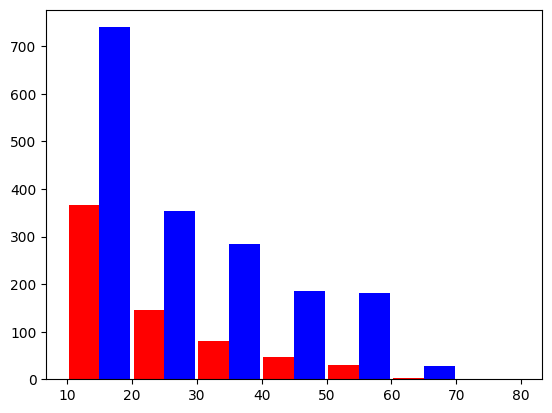

In [40]:
plt.hist([churn_df['deposits'],nonchurn_df['deposits']],bins = [10,20,30,40,50,60,70,80],color = ['red','blue'],rwidth = 0.95)

(array([[9.9750e+03, 0.0000e+00, 6.5000e+02, 0.0000e+00, 2.5800e+02,
         0.0000e+00, 1.3400e+02, 0.0000e+00, 5.8000e+01, 0.0000e+00,
         7.9000e+01, 1.4000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1143e+04, 0.0000e+00, 1.3410e+03, 0.0000e+00, 5.1000e+02,
         0.0000e+00, 2.6100e+02, 0.0000e+00, 1.2600e+02, 0.0000e+00,
         1.5500e+02, 1.6000e+01, 6.0000e+00, 1.0000e+00, 2.0000e+00,
         0.0000e+00]]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        10. , 15. , 20. , 25. , 30. , 35. ]),
 <a list of 2 BarContainer objects>)

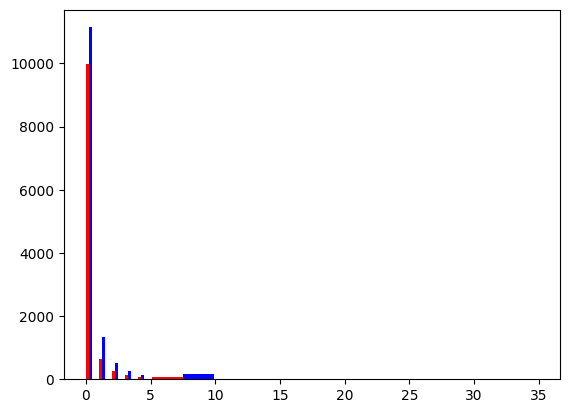

In [41]:
plt.hist([churn_df['withdrawal'],nonchurn_df['withdrawal']],bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,10,15,20,25,30,35],color = ['red','blue'],rwidth = 0.95)

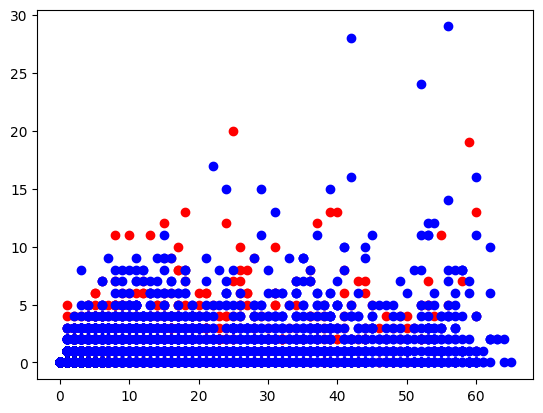

In [42]:
plt.scatter(churn_df['deposits'],churn_df['withdrawal'],color = 'red')
plt.scatter(nonchurn_df['deposits'],nonchurn_df['withdrawal'],color = 'blue')

In [43]:
# so who made the higher withdrawals are tend to churn and same as for the deposits

(array([[1.0068e+04, 4.4200e+02, 2.2600e+02, 1.3900e+02, 8.1000e+01,
         6.1000e+01, 3.4000e+01, 4.5000e+01, 2.6000e+01, 2.1000e+01,
         1.9000e+01, 7.0000e+00, 1.0000e+00, 0.0000e+00],
        [1.0975e+04, 8.2800e+02, 4.3000e+02, 3.0900e+02, 1.8200e+02,
         1.7300e+02, 1.4800e+02, 1.3700e+02, 1.0700e+02, 7.8000e+01,
         9.5000e+01, 8.6000e+01, 1.3000e+01, 0.0000e+00]]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70.]),
 <a list of 2 BarContainer objects>)

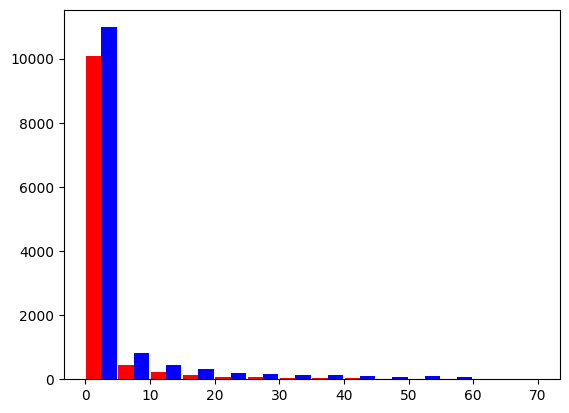

In [44]:
# NOTE:- the column purchases_partners is defined as the Customers who make purchases with partner merchants
plt.hist([churn_df['purchases'],nonchurn_df['purchases']],bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70],color = ['red','blue'],rwidth = 0.95)

(array([[6779.,  827.,  495.,  424.,  342.,  310.,  271.,  208.,  181.,
          204.,  133.,  151.,  112.,  115.],
        [4357.,  895.,  692.,  630.,  579.,  546.,  479.,  451.,  442.,
          402.,  371.,  378.,  350.,  414.]]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70.]),
 <a list of 2 BarContainer objects>)

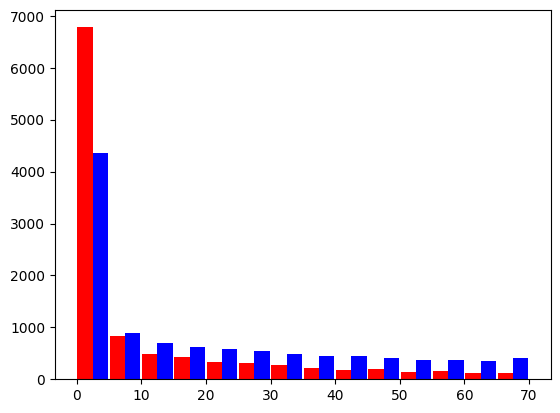

In [45]:
plt.hist([churn_df['purchases_partners'],nonchurn_df['purchases_partners']],bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70],color = ['red','blue'],rwidth = 0.95)

In [46]:
# 3.digital_engagement of customers
churn_df = df5[df5['churn']==1][['app_downloaded','web_user', 'app_web_user', 'ios_user', 'android_user','age','registered_phones']]
nonchurn_df = df5[df5['churn']==0][['app_downloaded','web_user', 'app_web_user', 'ios_user', 'android_user','age','registered_phones']]

(array([[  688., 10482.],
        [  502., 13059.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

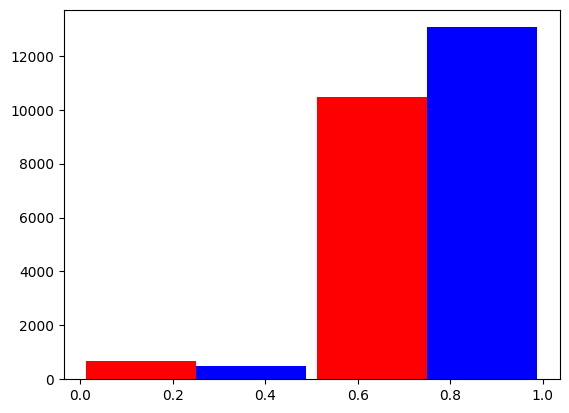

In [47]:
plt.hist([churn_df['app_downloaded'],nonchurn_df['app_downloaded']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

(array([[4172., 6998.],
        [5552., 8009.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

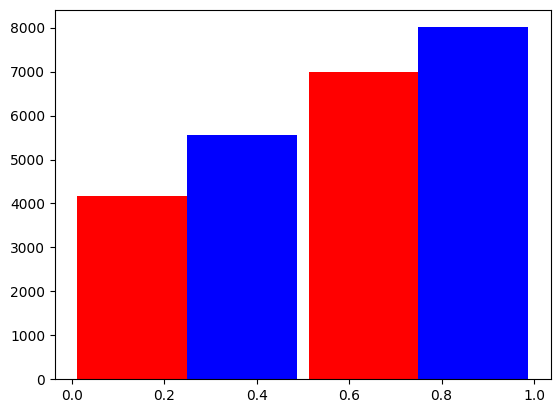

In [48]:
plt.hist([churn_df['web_user'],nonchurn_df['web_user']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

(array([[4822., 6348.],
        [6013., 7548.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

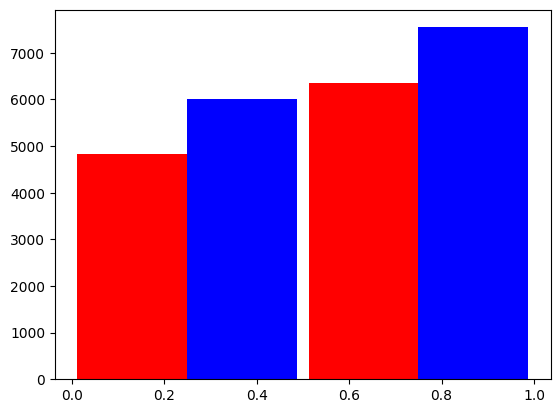

In [49]:
plt.hist([churn_df['app_web_user'],nonchurn_df['app_web_user']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

In [50]:
nonchurn_df.sample(5)

,app_downloaded,web_user,app_web_user,ios_user,android_user,age,registered_phones
14503,1,1,1,1,0,25.0,0
13922,1,0,0,0,1,24.0,0
10731,1,1,1,1,0,49.0,0
15107,1,1,1,1,0,28.0,0
23444,1,0,0,1,0,34.0,0


(array([[4851., 6319.],
        [5393., 8168.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

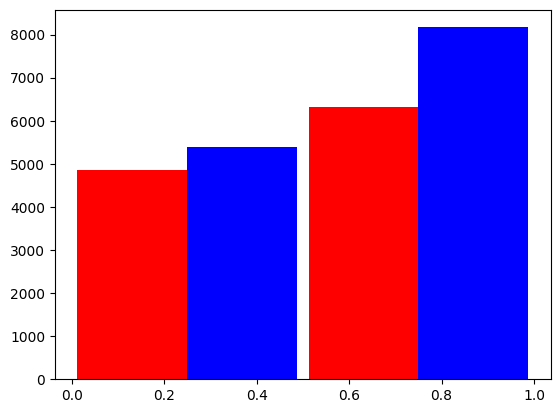

In [51]:
plt.hist([churn_df['android_user'],nonchurn_df['android_user']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

(array([[6658., 4512.],
        [8302., 5259.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

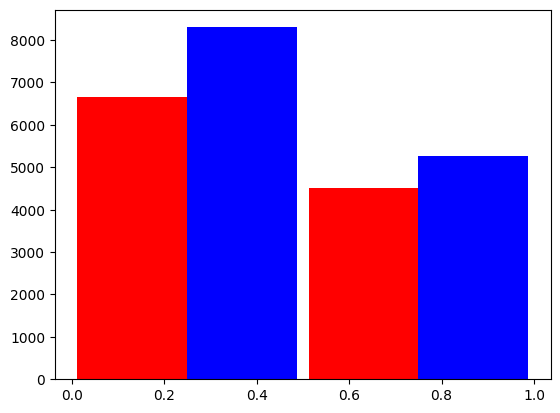

In [52]:
plt.hist([churn_df['ios_user'],nonchurn_df['ios_user']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)


(array([[ 8941.,     0.,  1770.,   348.,   111.],
        [11149.,     0.,  1958.,   345.,   109.]]),
 array([0., 1., 2., 3., 4., 5.]),
 <a list of 2 BarContainer objects>)

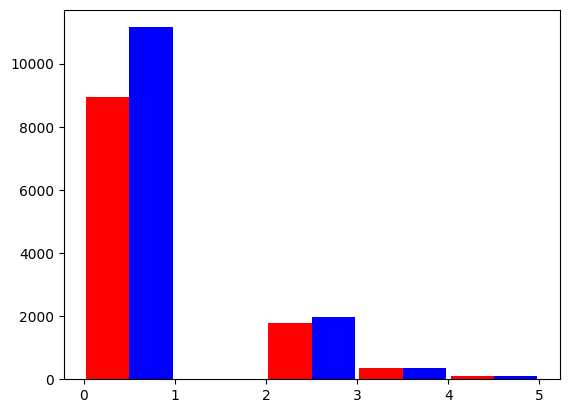

In [53]:
# android and non ios users are more likely to churn
plt.hist([churn_df['registered_phones'],nonchurn_df['registered_phones']],bins = [0,1,2,3,4,5],color = ['red','blue'],rwidth = 0.95)

In [54]:
nonchurn_df['registered_phones'].max()

5

In [55]:
# usually many customers are having 1 phone 

In [56]:
# 4.credit_card behaviour
churn_df = df5[df5['churn']==1][['age','cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked','cc_application_begin']]
nonchurn_df = df5[df5['churn']==0][['age','cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked','cc_application_begin']]

(array([[10423.,   533.],
        [13084.,   340.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

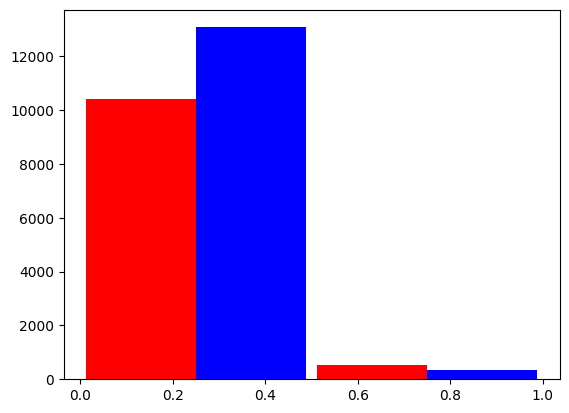

In [57]:
plt.hist([churn_df['cc_taken'],nonchurn_df['cc_taken']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

(array([[4072., 1823., 1264., 1043.,  764.,  297.,   23.,    0.,    0.,
            0.],
        [3497., 2022., 1782., 1734., 1663., 1132.,  140.,    0.,    0.,
            0.]]),
 array([  1.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 2 BarContainer objects>)

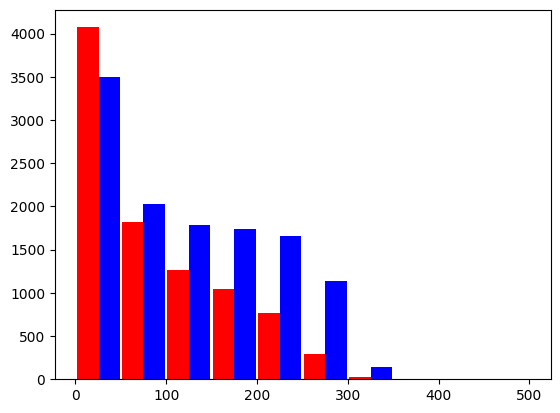

In [58]:
plt.hist([churn_df['cc_recommended'],nonchurn_df['cc_recommended']],bins = [1,50,100,150,200,250,300,350,400,450,500],color = ['red','blue'],rwidth = 0.95)

In [59]:
df5['cc_liked'].max()

27

(array([[11040.,   104.],
        [13478.,    68.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

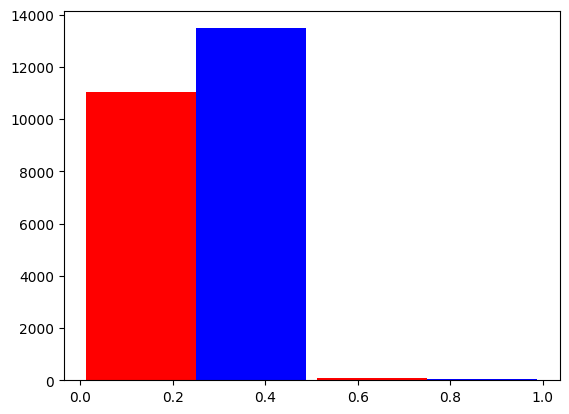

In [60]:
# so cc_recommended has some significanc
plt.hist([churn_df['cc_liked'],nonchurn_df['cc_liked']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

(array([[10855.,   215.],
        [13347.,   131.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

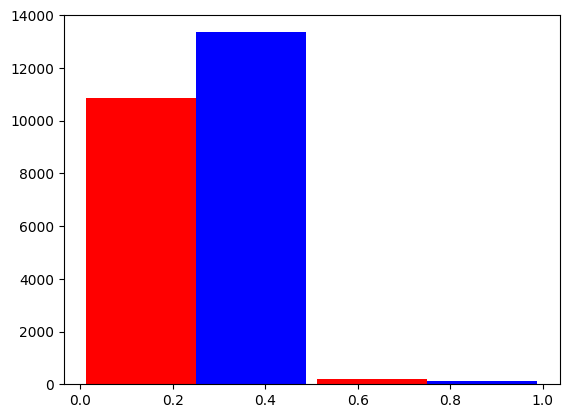

In [61]:
plt.hist([churn_df['cc_disliked'],nonchurn_df['cc_disliked']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

(array([[1.0979e+04, 1.6900e+02, 2.1000e+01, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00],
        [1.3045e+04, 4.5100e+02, 5.0000e+01, 1.1000e+01, 2.0000e+00,
         1.0000e+00, 1.0000e+00]]),
 array([  0.,  40.,  80., 120., 160., 200., 240., 280.]),
 <a list of 2 BarContainer objects>)

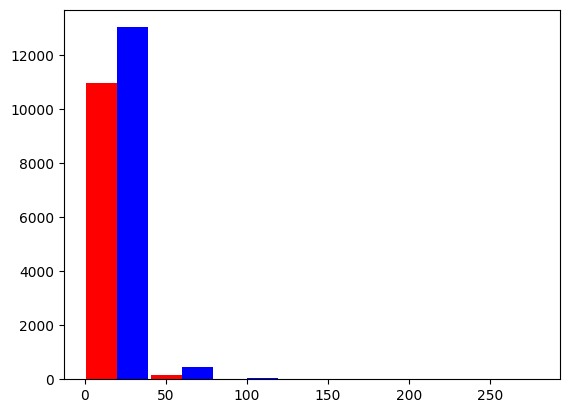

In [62]:
# liking and disliking is not that effective  
plt.hist([churn_df['cc_application_begin'],nonchurn_df['cc_application_begin']],bins = [0,40,80,120,160,200,240,280],color = ['red','blue'],rwidth = 0.95)

(array([[6.784e+03, 1.862e+03, 1.546e+03, 5.950e+02, 1.920e+02, 1.020e+02,
         3.200e+01, 2.500e+01, 1.000e+01, 1.000e+01, 3.000e+00, 5.000e+00,
         3.000e+00, 0.000e+00, 0.000e+00],
        [6.571e+03, 2.514e+03, 2.539e+03, 9.970e+02, 4.240e+02, 2.500e+02,
         1.110e+02, 5.700e+01, 3.300e+01, 2.300e+01, 1.400e+01, 8.000e+00,
         5.000e+00, 4.000e+00, 3.000e+00]]),
 array([  0.,   5.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.,
        100., 110., 120., 130., 140.]),
 <a list of 2 BarContainer objects>)

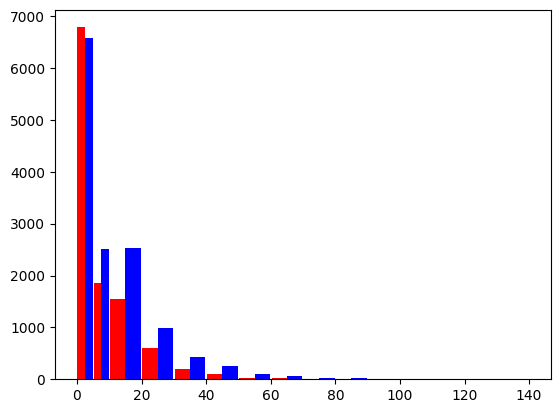

In [63]:
plt.hist([churn_df['cc_application_begin'],nonchurn_df['cc_application_begin']],bins = [0,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140],color = ['red','blue'],rwidth = 0.95)

In [64]:
# here who have not started are going to continue hemce it can make some impact 
# 5.loan information
churn_df = df5[df5['churn']==1][['waiting_4_loan','cancelled_loan','received_loan','rejected_loan']]
nonchurn_df = df5[df5['churn']==1][['waiting_4_loan','cancelled_loan','received_loan','rejected_loan']]

(array([[1.1162e+04, 8.0000e+00],
        [1.1162e+04, 8.0000e+00]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

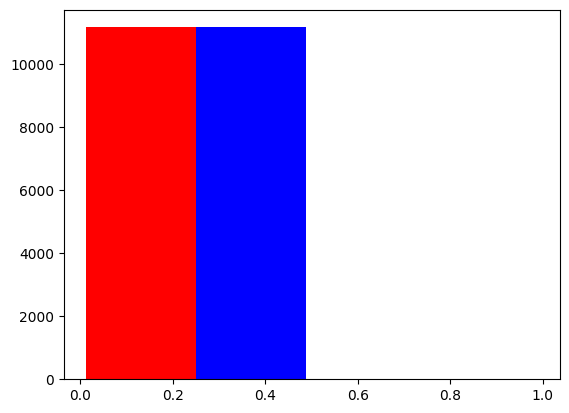

In [65]:
plt.hist([churn_df['waiting_4_loan'],nonchurn_df['waiting_4_loan']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

In [66]:
df5[df5['waiting_4_loan']==1].shape

(32, 27)

(array([[10896.,   274.],
        [10896.,   274.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

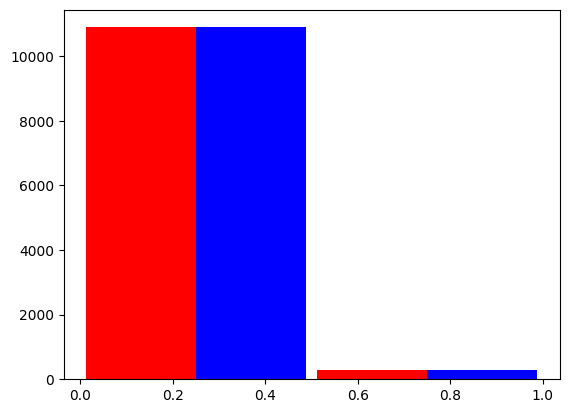

In [67]:
plt.hist([churn_df['cancelled_loan'],nonchurn_df['cancelled_loan']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

(array([[10878.,   292.],
        [10878.,   292.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

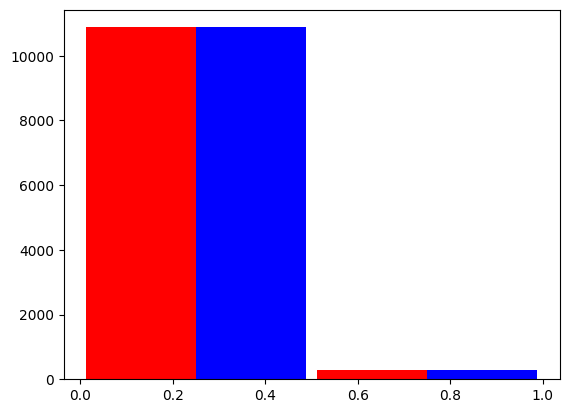

In [68]:
plt.hist([churn_df['received_loan'],nonchurn_df['received_loan']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

(array([[11063.,   107.],
        [11063.,   107.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

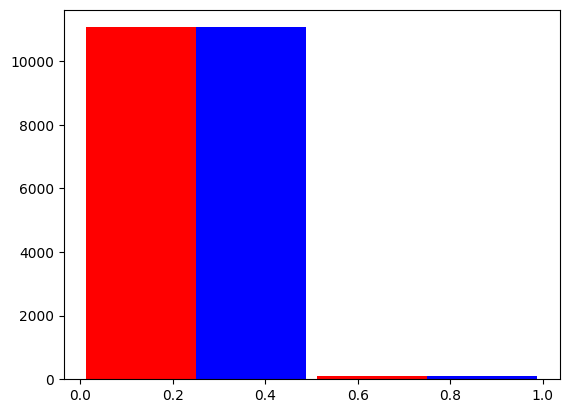

In [69]:
plt.hist([churn_df['rejected_loan'],nonchurn_df['rejected_loan']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)


In [70]:
churn_df.sample(5)

,waiting_4_loan,cancelled_loan,received_loan,rejected_loan
15112,0,0,0,0
18944,0,0,0,0
9486,0,0,0,0
11983,0,0,0,0
19471,0,0,0,0


In [71]:
# we do not need the whole loan details as we see here in the 4 plots above
df6 = df5.drop(['waiting_4_loan','cancelled_loan','received_loan','rejected_loan'],axis = 'columns')
# 6.rewards data (it is basically loyalty of the customer)
churn_df = df6[df6['churn']==1][['rewards_earned','reward_rate']]
nonchurn_df = df6[df6['churn']==0][['rewards_earned','reward_rate']]

(array([[2.936e+03, 1.827e+03, 1.462e+03, 9.670e+02, 7.720e+02, 7.120e+02,
         6.980e+02, 9.700e+01, 1.000e+01, 2.000e+00, 0.000e+00, 0.000e+00],
        [2.768e+03, 1.802e+03, 1.370e+03, 1.364e+03, 1.396e+03, 1.537e+03,
         1.829e+03, 1.680e+02, 1.700e+01, 0.000e+00, 0.000e+00, 1.000e+00]]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120.]),
 <a list of 2 BarContainer objects>)

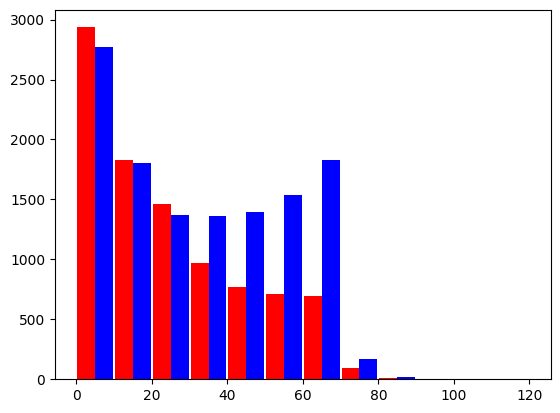

In [72]:
plt.hist([churn_df['rewards_earned'],nonchurn_df['rewards_earned']],bins = [0,10,20,30,40,50,60,70,80,90,100,110,120],color = ['red','blue'],rwidth = 0.95)

In [73]:
df6['rewards_earned'].max()

114.0

In [74]:
df6['reward_rate'].max()

4.0

(array([[5.008e+03, 2.501e+03, 1.569e+03, 1.118e+03, 8.450e+02, 7.200e+01,
         1.900e+01, 3.800e+01],
        [4.082e+03, 3.060e+03, 2.161e+03, 2.242e+03, 1.907e+03, 1.080e+02,
         0.000e+00, 1.000e+00]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 2 BarContainer objects>)

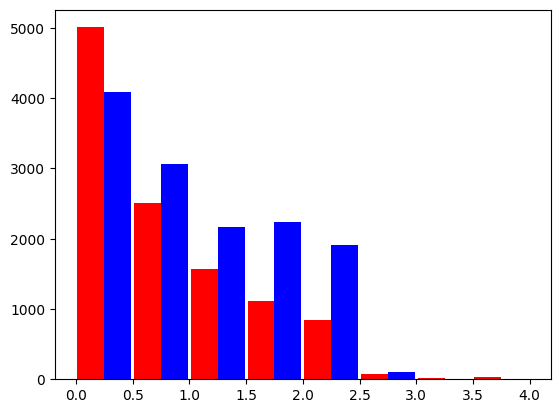

In [75]:
plt.hist([churn_df['reward_rate'],nonchurn_df['reward_rate']],bins = [0,0.5,1,1.5,2,2.5,3,3.5,4],color = ['red','blue'],rwidth = 0.95)

In [76]:
churn_df.sample(8)

,rewards_earned,reward_rate
21651,NaN,0.00
11385,61.0,2.03
23334,NaN,0.00
21561,6.0,0.20
6431,39.0,1.30
1168,70.0,2.33
9057,22.0,0.73
9802,NaN,0.00


In [77]:
nonchurn_df.sample(8)

,rewards_earned,reward_rate
4660,45.0,1.50
23563,NaN,0.00
19396,5.0,0.83
24324,52.0,1.73
1762,79.0,2.63
19882,2.0,0.07
6628,70.0,2.33
2042,16.0,0.53


(array([[8132., 3038.],
        [8801., 4760.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

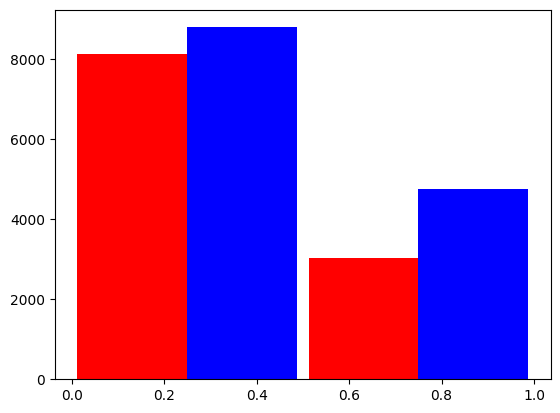

In [78]:
# 7.whether he is a refered customer or not
churn_df = df6[df6['churn']==1]['is_referred']
nonchurn_df = df6[df6['churn']==0]['is_referred']
plt.hist([churn_df,nonchurn_df],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

In [79]:
# based on activity over a period
churn_df = df6[df6['churn']==1][['left_for_one_month','left_for_two_month_plus']]
nonchurn_df = df6[df6['churn']==0][['left_for_one_month','left_for_two_month_plus']]

(array([[10904.,   266.],
        [13363.,   198.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

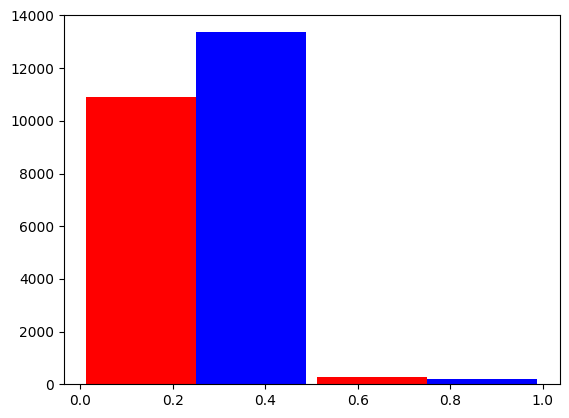

In [80]:
plt.hist([churn_df['left_for_one_month'],nonchurn_df['left_for_one_month']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)

(array([[ 9206.,  1964.],
        [11246.,  2315.]]),
 array([0. , 0.5, 1. ]),
 <a list of 2 BarContainer objects>)

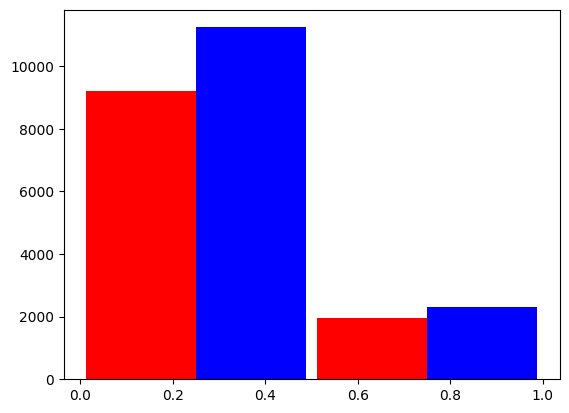

In [81]:
plt.hist([churn_df['left_for_two_month_plus'],nonchurn_df['left_for_two_month_plus']],bins = [0,0.5,1],color = ['red','blue'],rwidth = 0.95)


In [82]:
df6.dtypes

churn                        int64
age                        float64
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned             float64
reward_rate                float64
is_referred                  int64
dtype: object

In [83]:
# here evry column has contributed nearly in a similar pattern and there are some  columns with different such as at the begining churn is high and later churn is less when 
#  compared to non churn customers
# so now this dataset is polished and ready to prepare the model

In [84]:
df6.isna().any()

churn                      False
age                        False
credit_score               False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referred                False
dtype: bool

In [85]:
df6['rewards_earned'] = df6['rewards_earned'].fillna(df6['rewards_earned'].mean())
df6['rewards_earned'].isna().any()

False

In [86]:
x = df6.drop('churn',axis = 1)
y = df6['churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 42)

In [87]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter = 6000,C = 0.01)
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.6473263923986657

In [88]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 100,random_state = 42,max_depth = 30,min_samples_split = 10,min_samples_leaf = 5)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.6993834024057415

In [89]:
from xgboost import XGBClassifier
model3 = XGBClassifier(random_state=42,subsample = 0.8, eval_metric='logloss',learning_rate = 0.1,n_estimators = 100)
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.7053472152026685

In [90]:
for column in df6.columns:
    print(f'for {column} : {df6[column].max()}')

for churn : 1
for age : 91.0
for credit_score : 838.0
for deposits : 65
for withdrawal : 29
for purchases_partners : 1067
for purchases : 63
for cc_taken : 29
for cc_recommended : 522
for cc_disliked : 65
for cc_liked : 27
for cc_application_begin : 263
for app_downloaded : 1
for web_user : 1
for app_web_user : 1
for ios_user : 1
for android_user : 1
for registered_phones : 5
for left_for_two_month_plus : 1
for left_for_one_month : 1
for rewards_earned : 114.0
for reward_rate : 4.0
for is_referred : 1


In [91]:
df6.columns

Index(['churn', 'age', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'left_for_two_month_plus', 'left_for_one_month',
       'rewards_earned', 'reward_rate', 'is_referred'],
      dtype='object')

In [92]:
# since this is not giving the better expected score we need to try out to remove the outliers
df6.head()

,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,web_user,app_web_user,ios_user,android_user,registered_phones,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,0,21.0,577.000000,48,4,52,45,0,245,0,...,1,1,0,1,2,0,0,56.0,1.87,0
1,0,35.0,566.000000,15,0,73,15,0,199,0,...,1,1,0,1,0,0,0,49.0,1.63,0
2,1,31.0,519.000000,0,0,0,0,0,49,0,...,0,0,0,1,0,0,0,18.0,0.60,1
3,0,26.0,542.505153,0,0,30,0,0,56,0,...,1,1,0,1,2,0,0,23.0,0.77,0
4,0,33.0,558.000000,0,0,76,0,0,166,0,...,0,0,0,1,0,1,0,45.0,1.50,1


In [93]:
df6['cc_recommended'].std()

88.31762639970273

In [94]:
from scipy.stats import zscore

z_scores = df6.apply(zscore)
df7 = df6[(abs(z_scores) <= 3).all(axis=1)]

In [95]:
df7.shape

(20251, 23)

In [96]:
df7.sample(5)

,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,web_user,app_web_user,ios_user,android_user,registered_phones,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
6847,1,31.0,542.505153,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,1.00000,0.03,0
17648,1,56.0,542.505153,0,0,0,0,0,7,0,...,1,1,0,1,0,0,0,6.00000,0.20,0
16425,0,23.0,639.000000,0,0,23,0,0,57,0,...,1,1,0,1,0,0,0,14.00000,0.47,0
21157,1,40.0,542.505153,0,0,2,0,0,0,0,...,1,1,1,0,0,0,0,28.89257,0.00,0
12744,0,29.0,542.505153,0,0,27,0,0,45,0,...,1,1,0,1,0,0,0,21.00000,0.70,0


In [97]:
x = df7.drop('churn',axis = 1)
y = df7['churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 42)

In [98]:
new_model1 = LogisticRegression(max_iter = 6000,C = 0.01)
new_model1.fit(x_train,y_train)
new_model1.score(x_test,y_test)

0.6370818417479324

In [99]:
new_model2 = RandomForestClassifier(n_estimators = 100,random_state = 42,max_depth = 30,min_samples_split = 10,min_samples_leaf = 5)
new_model2.fit(x_train,y_train)
new_model2.score(x_test,y_test)

0.7004073571164053

In [100]:
new_model3 = XGBClassifier(random_state=42,subsample = 0.8, eval_metric='logloss',learning_rate = 0.1,n_estimators = 100)
new_model3.fit(x_train,y_train)
new_model3.score(x_test,y_test)

0.7063325515368473

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dt = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],  # Max depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x, y)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best Score: 0.681744230200743


In [102]:
# now let us remove somne more terms which are not that effective in nature
df7.columns

Index(['churn', 'age', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'left_for_two_month_plus', 'left_for_one_month',
       'rewards_earned', 'reward_rate', 'is_referred'],
      dtype='object')

In [103]:
df8 = df7.drop(['app_web_user','withdrawal','left_for_one_month','cc_liked','cc_disliked','cc_taken','app_downloaded','cc_application_begin','is_referred'],axis = 'columns')
x = df8.drop('churn',axis = 'columns')
y = df8['churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.2)

In [104]:
new_model3 = XGBClassifier(random_state = 42, eval_metric='logloss',learning_rate = 0.05,n_estimators = 100)
new_model3.fit(x_train,y_train)
y_pred = new_model3.predict(x_test)
new_model3.score(x_test,y_test)

0.7079733399160701

In [105]:
len(y_pred)

4051

In [106]:
np.sum(y_pred)

1620

In [107]:
np.sum(y_test)

1831

In [108]:
i = 0
cnt = 0
while(i<4051):
    if(y_pred[i]!=y_test.iloc[i] and y_pred[i]==1):
        cnt+=1
    i+=1
cnt

486

In [109]:
i = 0
cnt = 0
while(i<4051):
    if(y_pred[i]!=y_test.iloc[i] and y_pred[i]==0):
        cnt+=1
    i+=1
cnt

697

In [110]:
new_model2 = RandomForestClassifier(n_estimators = 100,random_state = 42,max_depth = 30,min_samples_split = 10,min_samples_leaf = 5)
new_model2.fit(x_train,y_train)
new_model2.score(x_test,y_test)

0.7089607504319921

In [111]:
df8[df8['churn']==1].shape

(9182, 14)

In [112]:
i = 0
cnt = 0
while(i<4051):
    if(y_test.iloc[i]==1):
        cnt+=1
    i+=1
cnt

1831

In [113]:
i = 0
cnt = 0
while(i<4051):
    if(y_pred[i]==1):
        cnt+=1
    i+=1
cnt

1620

In [114]:
i = 0
cnt = 0
while(i<len(y_train)):
    if(y_train.iloc[i]==1):
        cnt+=1
    i+=1
cnt

7351

In [115]:
len(y_train)

16200

In [116]:
len(y_test)

4051

In [117]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
scaler = MinMaxScaler()
x_test_scaled = scaler.fit_transform(x_test)
x_train_scaled

array([[0.11111111, 0.43421053, 0.44827586, ..., 0.        , 0.41860465,
        0.41      ],
       [0.2       , 0.49837222, 0.06896552, ..., 0.        , 0.3243322 ,
        0.        ],
       [0.44444444, 0.24671053, 0.        , ..., 0.        , 0.3255814 ,
        0.32333333],
       ...,
       [0.28888889, 0.12171053, 0.        , ..., 0.        , 0.77906977,
        0.75666667],
       [0.37777778, 0.33881579, 0.24137931, ..., 0.        , 0.3372093 ,
        0.33333333],
       [0.22222222, 0.10855263, 0.06896552, ..., 1.        , 0.36046512,
        0.35666667]])

In [118]:
model = SVC(kernel = 'rbf',class_weight = 'balanced',C = 100)
model.fit(x_train_scaled,y_train)
model.score(x_test_scaled,y_test)

0.6711922981979758

In [119]:
model = SVC(kernel = 'linear',class_weight = 'balanced',C = 100)
model.fit(x_train_scaled,y_train)
model.score(x_test_scaled,y_test)

0.6033078252283387

In [120]:
model = SVC(kernel = 'poly',class_weight = 'balanced',C = 100)
model.fit(x_train_scaled,y_train)
model.score(x_test_scaled,y_test)

0.6618118982967168

In [121]:
model = SVC(kernel = 'sigmoid',class_weight = 'balanced',C = 100)
model.fit(x_train_scaled,y_train)
model.score(x_test_scaled,y_test)

0.5038262157491977

In [122]:
print(1)

1


In [123]:
new_model3 = XGBClassifier(random_state = 42,gamma = 0.8,num_parallel_tree = 4,reg_lambda = 1,max_depth =6,learning_rate = 0.05,n_estimators = 100)
new_model3.fit(x_train,y_train)
y_pred = new_model3.predict(x_test)
new_model3.score(x_test,y_test)

0.7124166872377191

In [125]:
fold = KFold(n_splits = 5,shuffle = True,random_state = 42)
acc_list = []
p = df6.drop('churn',axis =1)
q = df6.churn
for train_index,test_index in fold.split(x):
    x_train,x_test = p.iloc[train_index],p.iloc[test_index]
    y_train,y_test = q.iloc[train_index],q.iloc[test_index]
    model = RandomForestClassifier(n_estimators = 100,random_state = 42,max_depth = 30,min_samples_split = 10,min_samples_leaf = 5)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(len(x_test),len(x_train))
    print(accuracy_score(y_test,y_pred),model.score(x_test,y_test))
    acc_list.append(model.score(x_test,y_test))
np.mean(acc_list)

4051 16200
0.7153789187854851 0.7153789187854851
4050 16201
0.6962962962962963 0.6962962962962963
4050 16201
0.7123456790123457 0.7123456790123457
4050 16201
0.7150617283950618 0.7150617283950618
4050 16201
0.7093827160493827 0.7093827160493827


0.7096930677077145

In [171]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
fold = KFold(n_splits = 5,shuffle = True,random_state = 42)
acc_list = []
for train_index,test_index in fold.split(x):
    x_train,x_test = p.iloc[train_index],p.iloc[test_index]
    y_train,y_test = q.iloc[train_index],q.iloc[test_index]
    model = XGBClassifier(random_state = 42,gamma = 0.8,num_parallel_tree = 5,reg_lambda = 1.05,max_depth =7,learning_rate = 0.051,n_estimators = 150)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_test,y_pred),model.score(x_test,y_test))
    acc_list.append(model.score(x_test,y_test))
np.mean(acc_list)

0.726734139718588 0.726734139718588
0.7088888888888889 0.7088888888888889
0.7177777777777777 0.7177777777777777
0.7217283950617284 0.7217283950617284
0.725679012345679 0.725679012345679


0.7201616427585324

In [193]:
# so our model xgbclassifier is the best model among the other
# here the parameters are not identified by the gridsearchcv
# it is based on the predicting by trail and error
# it was done because even in randomsearchcv we are not getting the better results
# so let us make the final model 
final_model = XGBClassifier(random_state = 42,gamma = 0.8,num_parallel_tree = 4,reg_lambda = 1,max_depth =6,learning_rate = 0.05,n_estimators = 100)
x_train,x_test,y_train,y_test = train_test_split(p,q,random_state = 42,test_size = 0.2)
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

0.7066909237921973

In [191]:
import pickle
with open('Churn_Prediction_model.pkl','wb') as file:
    pickle.dump(final_model,file)